## DL CASE-STUDIES | NATURAL LANGUAGE PROCESSING (NLP)

#  Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Spam Detection | Text Classification (NLP Case-study)
Dataset Source: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# Importing & Inspecting Data

In [3]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Pre-processing Data

### Basic Data Pre-processing

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.columns = ['label', 'message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
X = data['message']
y = data['label'].map({'ham': 0, 'spam': 1}).values


In [9]:
X

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [10]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [11]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

In [14]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [15]:
data_train  = pad_sequences(sequences_train)
data_train

array([[   0,    0,    0, ...,   30,  349, 1990],
       [   0,    0,    0, ...,  203, 1025,  225],
       [   0,    0,    0, ...,    2, 3794, 3795],
       ...,
       [   0,    0,    0, ...,  239,   30, 2064],
       [   0,    0,    0, ..., 1161,    1,  255],
       [   0,    0,    0, ...,    8,  290,  175]], dtype=int32)

In [16]:
data_train.shape

(4457, 121)

In [17]:
data_test = pad_sequences(sequences_test,maxlen=data_train.shape[1])

data_test

array([[   0,    0,    0, ..., 3023,   35, 1285],
       [   0,    0,    0, ..., 1097, 1806, 1171],
       [   0,    0,    0, ...,  264, 7182,  208],
       ...,
       [   0,    0,    0, ...,    3,   23,  139],
       [   0,    0,    0, ..., 1372,   30,  116],
       [   0,    0,    0, ...,  692,  389,  335]], dtype=int32)

In [18]:
data_test.shape

(1115, 121)

# Exploring Data

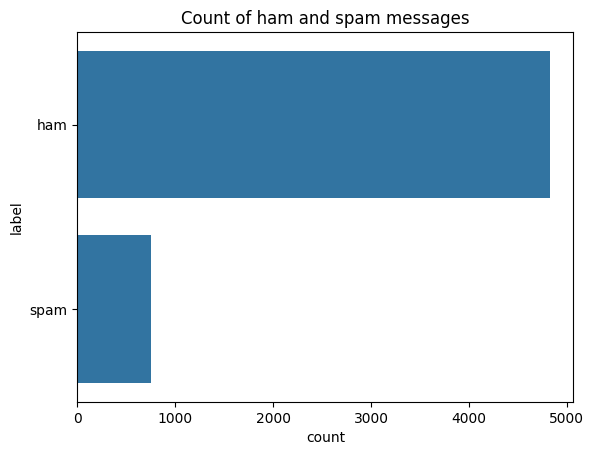

In [19]:
plt.title('Count of ham and spam messages')
sns.countplot(data['label'])
plt.show()

# Model Training & Building

In [25]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,Input,GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [26]:
# Input layer
i = Input(shape=(data_train.shape[1],))  # input layer takes in sequences of integers

# Embedding layer
x = Embedding(len(tokenizer.word_index) + 1, 20)(i) # This takes in sequences of integers and returns sequences of word vectors

# LSTM layer
x = LSTM(15, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation='sigmoid')(x)
# it is an binary classification problem, so we are using activation function ='sigmoid'

model = Model(i, x)

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
hist = model.fit(data_train, y_train, epochs=15, batch_size=32, validation_data=(data_test, y_test))

Epoch 1/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.8320 - loss: 0.5010 - val_accuracy: 0.8655 - val_loss: 0.2174
Epoch 2/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9573 - loss: 0.1525 - val_accuracy: 0.9812 - val_loss: 0.0967
Epoch 3/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.9940 - loss: 0.0589 - val_accuracy: 0.9812 - val_loss: 0.0801
Epoch 4/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.9937 - loss: 0.0429 - val_accuracy: 0.9848 - val_loss: 0.0734
Epoch 5/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.9955 - loss: 0.0296 - val_accuracy: 0.9839 - val_loss: 0.0691
Epoch 6/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9969 - loss: 0.0211 - val_accuracy: 0.9821 - val_loss: 0.0745
Epoch 7/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9997 - loss: 0.0107 - val_accuracy: 0.9839 - val_loss: 0.0612
Epoch 8/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9996 - loss: 0.0089 - val

# Model Evaluation

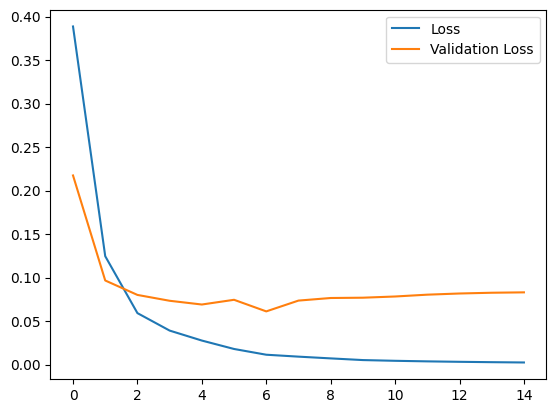

In [29]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

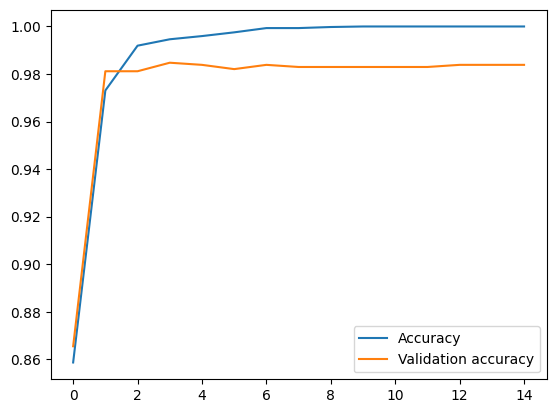

In [30]:
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()